In [1]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt

In [2]:
class Solver:
    
    def __init__(self, alpha):
        self.alpha = alpha
        self.roots = {}
        
    def lhs(self, x):
        return np.tan(x)
    
    def rhs(self, x):
        return 3*x/(3 + self.alpha*x**2)

    def interval(self, n):
        return (- np.pi/2 + n*np.pi, np.pi/2 + n*np.pi)
    
    def objective(self, x):
        return (self.lhs(x) - self.rhs(x))**2

    def root(self, n):
        if n not in self.roots:
            result = optimize.minimize_scalar(
                self.objective,
                method="bounded",
                bounds=self.interval(n)
            )
            self.roots[n] = result.x
        return self.roots[n]
    
    def compute(self, n):
        solutions = []
        for i in range(n):
            solutions.append(self.root(i+1))
        return np.array(solutions)

In [3]:
handler = Solver(3)

In [4]:
xlin = np.linspace(0, 10*np.pi, 5000)

In [5]:
xr = handler.compute(30)

In [6]:
xr

array([ 3.40560956,  6.43379729,  9.52821635, 12.64480217, 15.77103322,
       18.90226315, 22.03640253, 25.17238551, 28.30960007, 31.44768341,
       34.58640073, 37.72559472, 40.86515608, 44.00500651, 47.14508845,
       50.28535869, 53.4257841 , 56.5663389 , 59.70700273, 62.84775927,
       65.98859531, 69.12950003, 72.27046448, 75.41148122, 78.55254398,
       81.69364745, 84.83478712, 87.97595912, 91.11716011, 94.25838718])

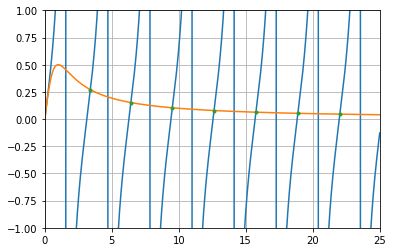

In [7]:
fig, axe = plt.subplots()
axe.plot(xlin, handler.lhs(xlin))
axe.plot(xlin, handler.rhs(xlin))
axe.plot(xr, handler.rhs(xr), ".")
axe.set_xlim([0, 25])
axe.set_ylim([-1, 1])
axe.grid()

In [41]:
class CrankDiffusion:
    
    def __init__(self, alpha=1, radius=3e-3, partition=1/4, n=30):
        self.n = n
        self.alpha = alpha
        self.partition = partition
        self.radius = radius
        self.terms = Solver(self.alpha).compute(self.n)
        self.objective = np.vectorize(self._objective, excluded='self')
        
    def sum(self, t, D):
        return np.sum([
            np.exp(-(D*t*term**2)/(self.radius**2))/(9*(self.alpha + 1) + (self.alpha**2)*term**2)
            for term in self.terms
        ])
    
    def _objective(self, t, D):
        return self.alpha/(1 + self.alpha) + 6*self.alpha*self.sum(t, D)
        

In [42]:
S = CrankDiffusion()

In [54]:
tlin = np.linspace(0, 50000, 30)

In [55]:
ratio = S.objective(tlin, 1e-10)

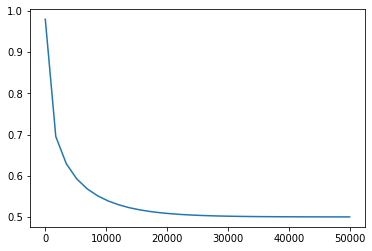

In [56]:
fig, axe = plt.subplots()
axe.plot(tlin, ratio)